In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv("merged_df.csv")  

In [3]:
# Convert the date columns to datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])

In [4]:
# Choose the specific year for analysis
chosen_year = 2022

# Randomly select six days from the chosen year
random_days = df[df['Year'] == chosen_year].sample(6, random_state=42)

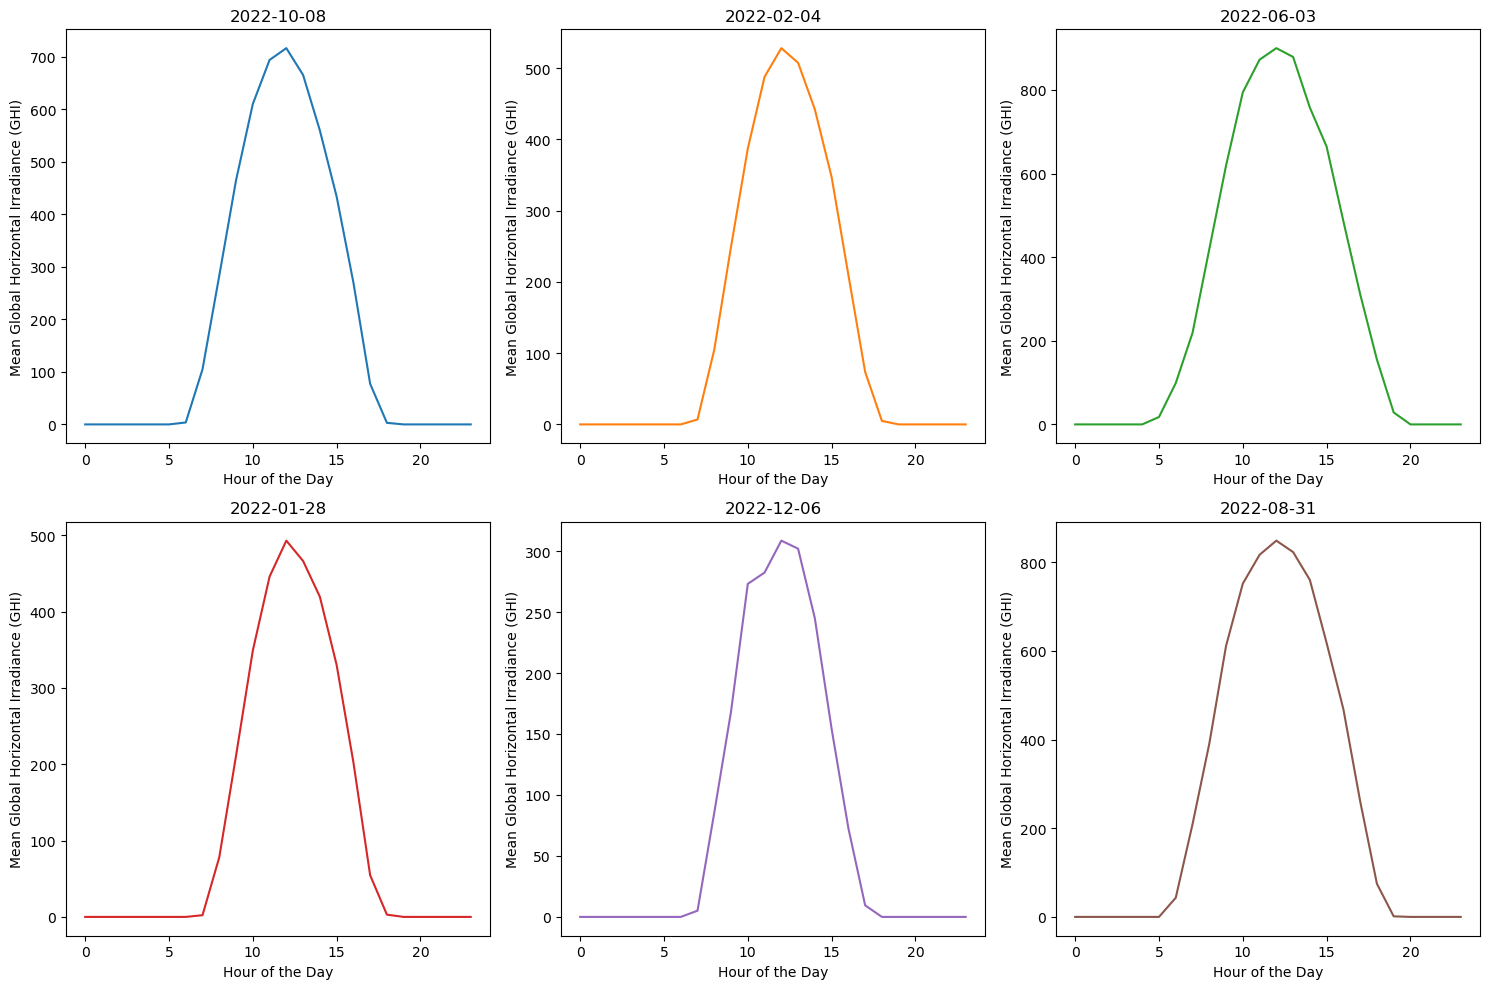

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes = axes.flatten()

# Perform temporal analysis for each randomly selected day and create separate plots
for i, (_, row) in enumerate(random_days.iterrows()):
    day_data = df[(df['Year'] == row['Year']) & (df['Month'] == row['Month']) & (df['Day'] == row['Day'])]
    hourly_mean_day = day_data.groupby('Hour')['GHI'].mean()

    # Plotting temporal analysis for each randomly selected day
    sns.lineplot(x=hourly_mean_day.index, y=hourly_mean_day.values, ax=axes[i], color=f'C{i}')
    axes[i].set_title(row['Date'].strftime("%Y-%m-%d"))
    axes[i].set_xlabel('Hour of the Day')
    axes[i].set_ylabel('Mean Global Horizontal Irradiance (GHI)')

plt.tight_layout()
plt.show()

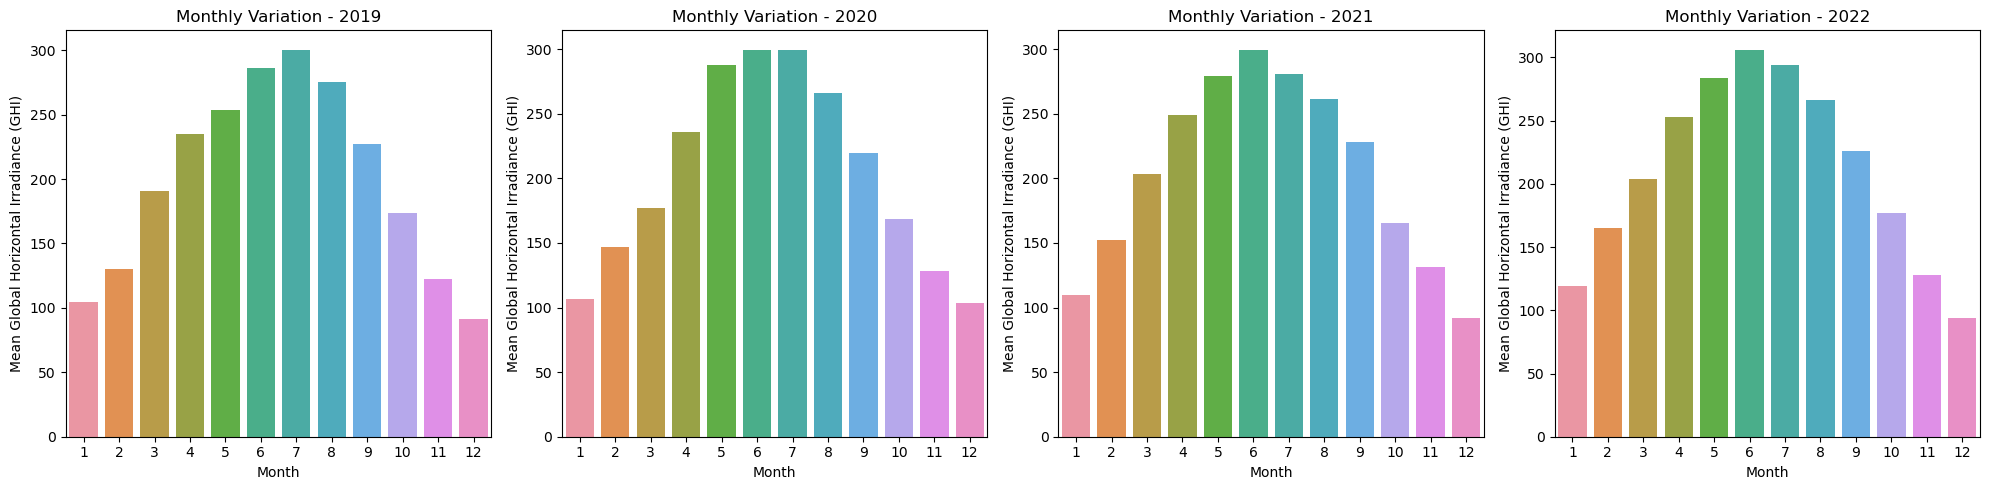

In [6]:
# Create subplots with four columns for each year
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Iterate through each year and plot Monthly variation analysis
for i, year in enumerate(range(2019, 2023)):
    yearly_data = df[df['Year'] == year]
    monthly_mean_yearly = yearly_data.groupby('Month')['GHI'].mean()

    # Plotting Monthly variation analysis for each year
    sns.barplot(x=monthly_mean_yearly.index, y=monthly_mean_yearly.values, ax=axes[i])
    axes[i].set_title(f'Monthly Variation - {year}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Mean Global Horizontal Irradiance (GHI)')

plt.tight_layout()
plt.show()


In [7]:
df['Month'] = df['Date'].dt.month

In [8]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

df['Season'] = df['Month'].apply(get_season)

In [9]:
lag_hours = 3
df['ClearskyDHI_Lag'] = df['Clearsky DHI'].shift(lag_hours)

In [10]:
for lag in [1, 3, 6, 12]:
    df[f'ClearskyDHI_Lag_{lag}'] = df['Clearsky DHI'].shift(lag)

In [11]:
window_size = 3
df['ClearskyDHI_RollingMean'] = df['Clearsky DHI'].rolling(window=window_size).mean()

In [12]:
df['ClearskyDHI_SameHour_LastWeek'] = df['Clearsky DHI'].shift(24*7)
df['ClearskyDHI_SameHour_LastMonth'] = df['Clearsky DHI'].shift(24*30)

In [13]:
from sklearn.impute import KNNImputer

# List of columns with missing values
cols_to_impute = ['ClearskyDHI_Lag', 'ClearskyDHI_Lag_1', 'ClearskyDHI_Lag_3', 'ClearskyDHI_Lag_6',
                  'ClearskyDHI_Lag_12', 'ClearskyDHI_RollingMean', 'ClearskyDHI_SameHour_LastWeek', 'ClearskyDHI_SameHour_LastMonth']

# Instantiate KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Impute missing values in selected columns
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

In [14]:
df.head()

,Year,Month,Day,Hour,Minute,City,Latitude,Longitude,Clearsky DHI,Clearsky DNI,...,Date,Season,ClearskyDHI_Lag,ClearskyDHI_Lag_1,ClearskyDHI_Lag_3,ClearskyDHI_Lag_6,ClearskyDHI_Lag_12,ClearskyDHI_RollingMean,ClearskyDHI_SameHour_LastWeek,ClearskyDHI_SameHour_LastMonth
0,2022,1,1,0,0,Albuquerque,35.08,-106.65,0,0,...,2022-01-01 00:00:00,Winter,44.189414,44.189288,44.189414,44.189604,44.189557,44.189351,44.194439,44.211052
1,2022,1,1,1,0,Albuquerque,35.08,-106.65,0,0,...,2022-01-01 01:00:00,Winter,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2022,1,1,2,0,Albuquerque,35.08,-106.65,0,0,...,2022-01-01 02:00:00,Winter,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000
3,2022,1,1,3,0,Albuquerque,35.08,-106.65,0,0,...,2022-01-01 03:00:00,Winter,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000
4,2022,1,1,4,0,Albuquerque,35.08,-106.65,0,0,...,2022-01-01 04:00:00,Winter,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000


In [15]:
# Subset data for each season
winter_data = df[df['Season'] == 'Winter']
spring_data = df[df['Season'] == 'Spring']
summer_data = df[df['Season'] == 'Summer']
fall_data = df[df['Season'] == 'Fall']

In [16]:
# Descriptive statistics for each season
winter_stats = winter_data['Clearsky DHI'].describe()
spring_stats = spring_data['Clearsky DHI'].describe()
summer_stats = summer_data['Clearsky DHI'].describe()
fall_stats = fall_data['Clearsky DHI'].describe()

print("Winter Statistics:\n", winter_stats)
print("\nSpring Statistics:\n", spring_stats)
print("\nSummer Statistics:\n", summer_stats)
print("\nFall Statistics:\n", fall_stats)

Winter Statistics:
 count    172800.000000
mean         27.402604
std          36.933600
min           0.000000
25%           0.000000
50%           0.000000
75%          60.000000
max         250.000000
Name: Clearsky DHI, dtype: float64

Spring Statistics:
 count    176640.000000
mean         53.543654
std          58.782541
min           0.000000
25%           0.000000
50%          33.000000
75%         104.000000
max         445.000000
Name: Clearsky DHI, dtype: float64

Summer Statistics:
 count    176640.000000
mean         58.708956
std          61.577432
min           0.000000
25%           0.000000
50%          53.000000
75%         105.000000
max         587.000000
Name: Clearsky DHI, dtype: float64

Fall Statistics:
 count    174720.000000
mean         36.654865
std          48.274836
min           0.000000
25%           0.000000
50%           0.000000
75%          73.000000
max         501.000000
Name: Clearsky DHI, dtype: float64


<Figure size 1000x600 with 0 Axes>

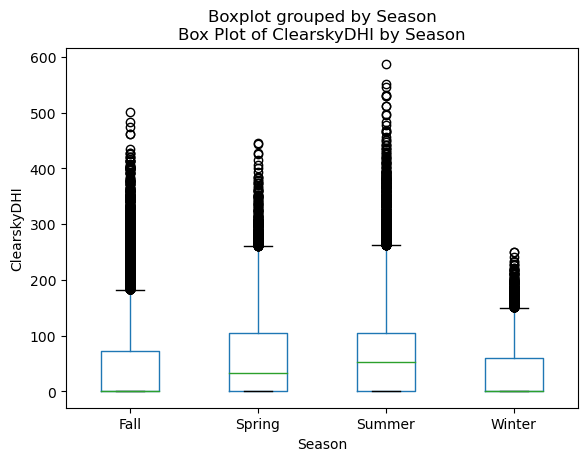

In [17]:
# Box plots for each season
plt.figure(figsize=(10, 6))
df.boxplot(column='Clearsky DHI', by='Season', grid=False)
plt.title('Box Plot of ClearskyDHI by Season')
plt.xlabel('Season')
plt.ylabel('ClearskyDHI')
plt.show()

In [18]:
#Correlation Analysis without Lag Features
# Exclude non-numeric columns for analysis
numeric_columns = [ 'Clearsky DHI', 'Clearsky DNI', 'GHI', 'Ozone', 'Relative Humidity',
                   'Solar Zenith Angle', 'Surface Albedo', 'Pressure', 'Precipitable Water',
                   'Wind Direction', 'Wind Speed']

df_numeric = df[numeric_columns]

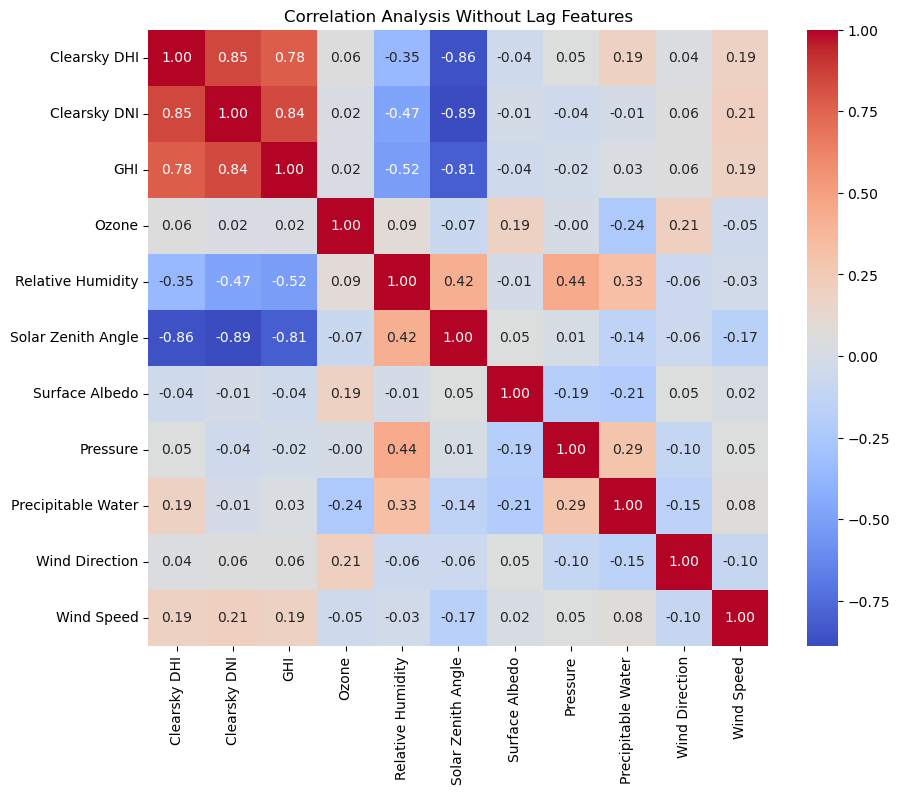

In [19]:
# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Plotting correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Analysis Without Lag Features')
plt.show()

In [20]:
#Correlation Analysis with Lag Features
#Consider relevant numeric features
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
relevant_features = ['Clearsky DHI', 'Clearsky DNI','GHI',  'ClearskyDHI_Lag', 'ClearskyDHI_Lag_1', 
                     'ClearskyDHI_Lag_3', 'ClearskyDHI_Lag_6', 'ClearskyDHI_Lag_12', 
                     'ClearskyDHI_RollingMean', 'ClearskyDHI_SameHour_LastWeek', 
                     'ClearskyDHI_SameHour_LastMonth', 'Solar Zenith Angle', 'Relative Humidity']
selected_features = [col for col in relevant_features if col in numeric_columns]

In [21]:
# Compute the correlation matrix
correlation_matrix = df[selected_features].corr()

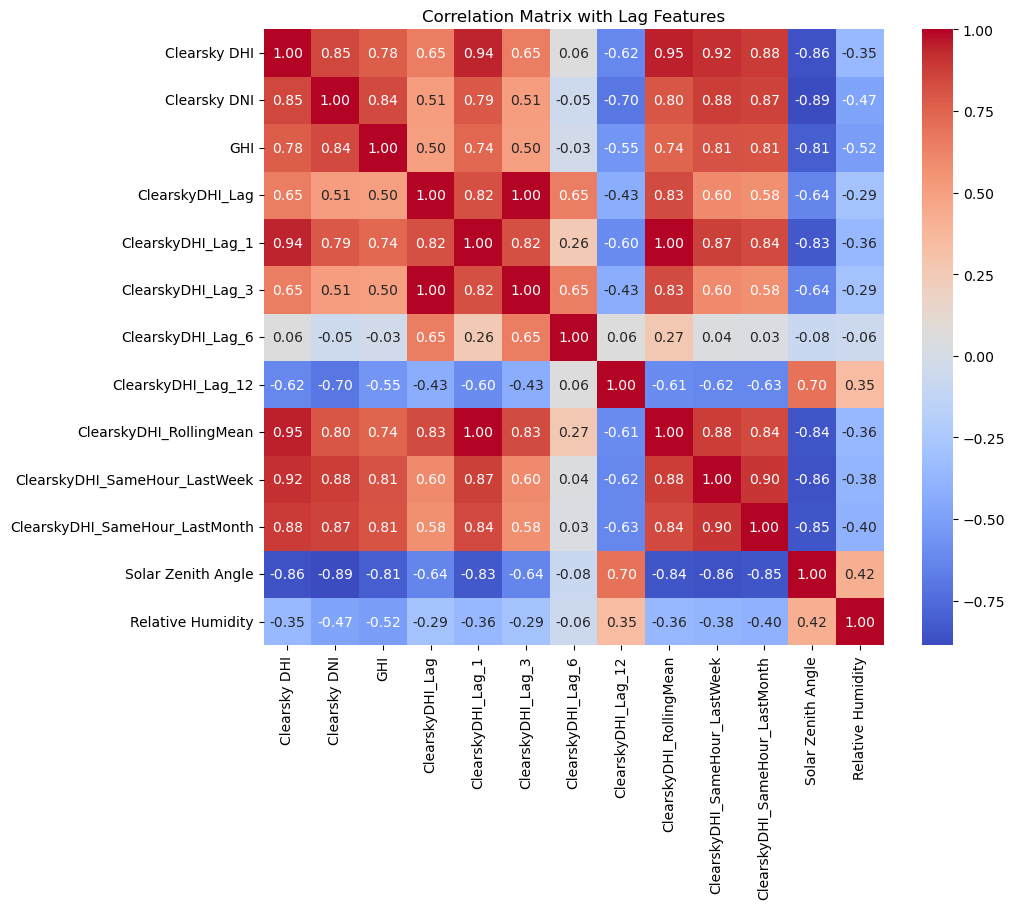

In [22]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Lag Features')
plt.show()

In [23]:
df.to_csv('solar_data_without_day.csv', index=False)